# Lab 1: Neural Networks
This week, you will use EEG recording of one patient with epileptic seizures to train a convolutional neural network. You can use this link https://keras.io/api/ to get more information about how to work with keras.

## A: Data pre-processing
We first load all python packages required for the code. In principle, these are all packages you will need for this lab, so **you’re not allowed** to import any other packages besides the ones we provide you with.

#### Load packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras as K
import pandas as pd
import csv
from keras import models, layers


Now, we load the dataset. This is an EEG recording of one patient with epilepsy with annotator labels. A label 1 means that the patient had an epileptic seizure in that fragment of the data, label 0 means that the patient did not have an epileptic seizure.


In the code below, you'll be provided with 'data', 'label' and 'test_data'. The 'data' and 'label' are the dataset that you will use to train and validate neural networks. At the end of the lab, you will use your trained convolutional neural network to predict the labels of 'test_data'. When you hand in the lab, your predicted labels will be compared against a set of secret annotator labels by Kaggle.

#### Import data

In [2]:
path_data = 'patient05_train.csv'
file = open(path_data)
csvreader = csv.reader(file)
rows = []
for row in csvreader:
    res = [float(i) for i in row]
    rows.append(res)
rows = np.asarray(rows)
print(np.shape(rows))
label = rows[:, 0].astype(int)
data = rows[:, 1:]

path_data = 'patient05_test.csv'
file = open(path_data)
csvreader = csv.reader(file)
rows = []
for row in csvreader:
    res = [float(i) for i in row]
    rows.append(res)
test_data = np.asarray(rows)
print(np.shape(test_data))

(869, 1025)
(218, 1024)


#### Split the dataset into training and validation sets.

In [3]:
train_data, validation_data, train_labels, validation_labels= train_test_split(data, label, test_size=0.2)

print('train data shape:',np.shape(train_data))
print('validation data shape:',np.shape(validation_data))
print('train labels shape:',np.shape(train_labels))
print('validation labels shape:',np.shape(validation_labels))

train data shape: (695, 1024)
validation data shape: (174, 1024)
train labels shape: (695,)
validation labels shape: (174,)


#### Standardize the training set to have a mean of 0 and a variance of 1.

Hint: Use the mean and standard deviation (the square root of variance) of the training set to standardize the validation and test sets.

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_data = scaler.fit_transform(train_data)

validation_data = scaler.transform(validation_data)

test_data = scaler.transform(test_data)

print(np.shape(train_data))

(695, 1024)


## B: Model training

#### Create a convolutional neural network using Keras to be applied to the training set.

In [21]:
input_shape = (train_data.shape[1], 1)

train_data_reshaped = train_data.reshape((-1, train_data.shape[1], 1))
validation_data_reshaped = validation_data.reshape((-1, validation_data.shape[1], 1))
test_data_reshaped = test_data.reshape((-1, test_data.shape[1], 1))

model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the neural network.

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 1022, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 511, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 509, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,561 (41.25 KB)

 Trainable params: 10,561 (41.25 KB)

 Non-trainable params: 0 (0.00 B)

#### Fit the neural network using test and validation sets.

Hint: You can use callback for early stopping to avoid overfitting.

In [23]:
history = model.fit(
    train_data_reshaped, train_labels,
    validation_data=(validation_data_reshaped, validation_labels),
    epochs=50,
    batch_size=64,
    verbose=1
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5073 - loss: 0.6766 - val_accuracy: 0.4770 - val_loss: 0.6273
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5079 - loss: 0.6020 - val_accuracy: 0.4770 - val_loss: 0.5802
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5130 - loss: 0.5531 - val_accuracy: 0.5632 - val_loss: 0.5393
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6483 - loss: 0.5100 - val_accuracy: 0.7471 - val_loss: 0.4961
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7954 - loss: 0.4958 - val_accuracy: 0.8563 - val_loss: 0.4508
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8575 - loss: 0.4455 - val_accuracy: 0.9080 - val_loss: 0.4016
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9093 - loss: 0.3880 - val_accuracy: 0.9368 - val_loss: 0.3525
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9218 - loss: 0.3324 - val_accuracy: 0.9253 - v

#### Plot the learning curves.

Try to analyze the curves for yourself.

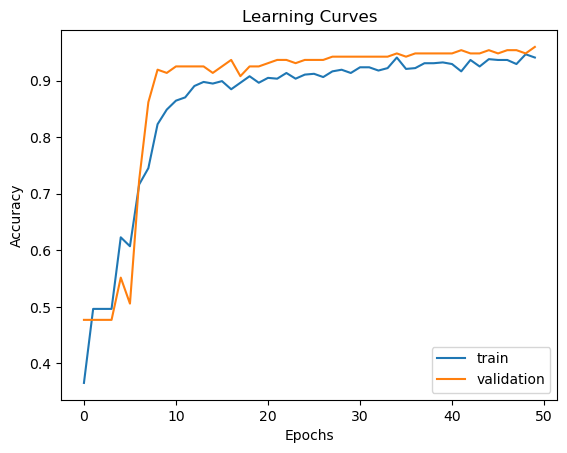

In [20]:
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

#### For the validation set, plot the ROC curve. Calculate and report AUC score.

Hint: You should use **predict** function to predict the labels. Then from **metrics** module, call functions to calculate false positive rate, true positive rate and AUC score.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


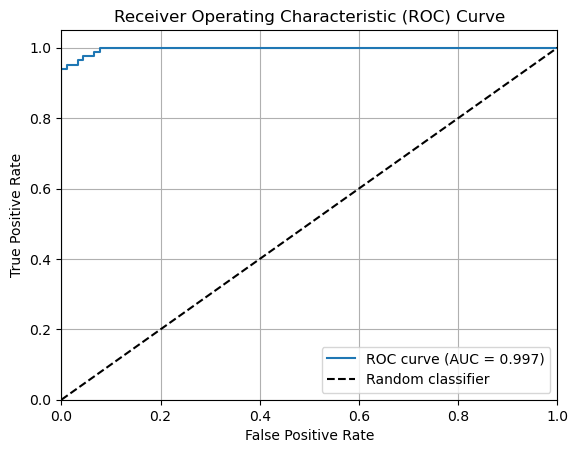

AUC Score: 0.9972


In [24]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for validation set
predicted_probs_val = model.predict(validation_data_reshaped).flatten()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(validation_labels, predicted_probs_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f'AUC Score: {roc_auc:.4f}')

#### Predict labels for the test set.

In [ ]:
# predicted_labels_test = model.predict(test_data)
# #submission_array = ... #You can use the commented code below, or any other code that results in a vector of size [~218 x 1] of 0 and 1’s that correspond to
# #the predicted label. It is important to do this part correctly, as it directly affects your final score.

# submission_array = [0 if predicted_labels_test[i,0]>predicted_labels_test[i,1] else 1 for i in range(np.shape(predicted_labels_test)[0])]

# Predict probabilities for test set
predicted_probs_test = model.predict(test_data_reshaped).flatten()

# Convert probabilities to binary labels (threshold = 0.5)
submission_array = (predicted_probs_test > 0.5).astype(int)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

#### Collect the predictions.

In [ ]:
x = [i for i in range(1,len(submission_array)+1)]
d = {'Id':x,'Category': submission_array}
df = pd.DataFrame(data=d)
print(df)
file_name = 'submission.csv'
df.to_csv(file_name, sep=',',index=False)

## C: Questions

Think about these questions to demonstrate your lab/results to TA in lab sessions:

**1.** Describe how you chose the layers and activation functions, and explain how these choices are justified based on your dataset’s characteristics and the specific problem you aim to solve.

**2.** How do parameters like the network’s depth, number of filters, and kernel size affect its ability to capture intricate patterns in the data? Describe how you evaluate the number of parameters in your model and how these factors relate to issues like underfitting and overfitting.

**3.** Describe how you optimize model complexity for your task. Discuss techniques such as regularization and grid search, and explain how each could impact your model’s performance and ability to generalize well to new data.